In [311]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
# import pandas as pd
# from astropy.table import Table

filepath = '/Users/katelynsmith/Desktop/spectra/LSDresultsV2/'
spectras = ['2811714V2', '2811876V2', '2812052V2', '2812217V2', '2812495V2', '2812675V2', '2812884V2', '2813059V2', '2813220V2', '2813436V2', '2813529V2', '2838891V2', '2838899V2', '2839172V2', '2839366V2', '2839532V2', '2839709V2', '2839889V2', '2840072V2']


In [313]:
# accessing individual rows and values
# noting that the fourth column should host the Stokes V values and the first the radial velocity values

# function for obtaining Stokes V values
def getStokesV(dir, spectra: list, num_files, rows = 266, StokesVPosition = 3):
    # defining an empty matrix to store all the Stokes V values
    all_Stokes_V = np.zeros((rows, num_files))
    # reading in the data
    for n in range(num_files):
        with open(dir + spectra[n] + '.dat', 'r') as file:
            content = file.read()

        subcontent = content.split('\n')
        
        # rows should start at 2 and go to the length of the datafile to avoid the header info
        # looping over the rows in the data files
        for r in range(2, rows):
            # splitting the data into individual values
            data_rows = subcontent[r].split(' ')
            data_rows[:] = [x for x in data_rows if x]
            Stokes_V = float(data_rows[StokesVPosition])
            # storing the Stokes V values in the matrix
            all_Stokes_V[r-2][n] = Stokes_V
    return all_Stokes_V

# function for obtaining radial velocity values
def getVelocity(dir, spectra: list, num_files, rows = 266, VelocityPosition = 0):
    # defining an empty matrix to store all the velocity values
    all_Velocities = np.zeros((rows, num_files))
    # reading in the data
    for n in range(num_files):
        with open(dir + spectra[n] + '.dat', 'r') as file:
            content = file.read()

        subcontent = content.split('\n')
        
        # rows should start at 2 and go to the length of the datafile to avoid the header info
        # looping over the rows in the data files
        for r in range(2, rows):
            # splitting the data into individual values
            data_rows = subcontent[r].split(' ')
            data_rows[:] = [x for x in data_rows if x]
            Velocity = float(data_rows[VelocityPosition])
            # storing the velocity values in the matrix
            all_Velocities[r-2][n] = Velocity
    return all_Velocities

In [288]:
# running the above functions to isolate the required data
SV = getStokesV(filepath, spectras, 18)
vel = getVelocity(filepath, spectras, 18)

In [314]:
# calculating the standard deviation of each data point relative to the other files
SD_of_StokesV = []
for row in range(266):
    std = np.std(SV[row,:])
    SD_of_StokesV.append(std)

velocity = vel[:-2,0]
SD_of_StokesV = SD_of_StokesV[:-2]


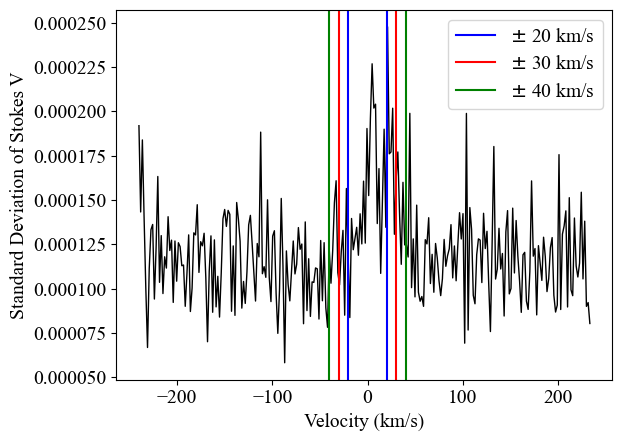

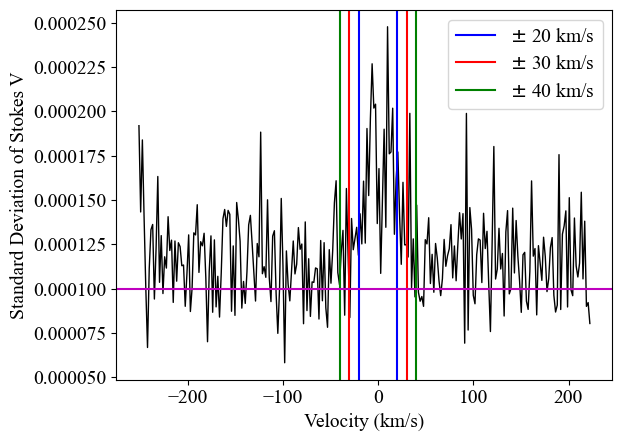

In [315]:
# plotting the new profile
plt.plot(velocity, SD_of_StokesV, 'k-', linewidth=1)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Standard Deviation of Stokes V')
plt.axvline(x = -20, color = 'b', label = '$\pm$ 20 km/s')
plt.axvline(x = 20, color = 'b')
plt.axvline(x = -30, color = 'r', label = '$\pm$ 30 km/s')
plt.axvline(x = 30, color = 'r')
plt.axvline(x = -40, color = 'g', label = '$\pm$ 40 km/s')
plt.axvline(x = 40, color = 'g')
plt.legend()
plt.show()

# shifting it into the stellar reference frame
adjusted_V = velocity - 11
plt.plot(adjusted_V, SD_of_StokesV, 'k-', linewidth=1)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Standard Deviation of Stokes V')
plt.axvline(x = -20, color = 'b', label = '$\pm$ 20 km/s')
plt.axvline(x = 20, color = 'b')
plt.axvline(x = -30, color = 'r', label = '$\pm$ 30 km/s')
plt.axvline(x = 30, color = 'r')
plt.axvline(x = -40, color = 'g', label = '$\pm$ 40 km/s')
plt.axvline(x = 40, color = 'g')
plt.axhline(y = 1E-4, color = 'm')
plt.legend()
plt.show()

In [310]:
# testing how to access data

a = np.array(SV[:,0])
b = np.array(SV[:,1])

c = np.diff([a,b], axis=0)
display(c)
c[0][0]

f = a[0]
g = b[0]
h = f-g
display(h)







array([[ 1.28561200e-04, -2.21088280e-04, -7.94977900e-05,
        -2.86912000e-05, -1.02696800e-05, -3.09661980e-05,
        -1.34816926e-04,  3.13734000e-06, -3.07788900e-05,
        -9.44195000e-06, -8.50020450e-05, -3.34382500e-04,
        -1.19879800e-04, -2.30075800e-05,  2.18421100e-05,
        -2.07115110e-04, -2.35323240e-04,  1.03401570e-04,
         1.22523520e-04,  1.36276600e-05,  1.94925420e-04,
         3.13353990e-04,  2.42236600e-05, -2.30465700e-05,
        -4.22852400e-04,  2.06492400e-05, -1.74187590e-04,
        -2.53964000e-05, -3.31063800e-04, -3.37684300e-05,
         2.33357500e-05,  5.40933980e-05,  4.96915400e-05,
         4.10343100e-04, -3.91689200e-04,  4.44994800e-05,
        -3.78940000e-05, -4.94328000e-05, -5.14628400e-05,
         2.68184450e-04,  8.84643500e-05,  1.37486250e-04,
         2.64912380e-05,  3.67092600e-05,  7.48973000e-05,
         1.27127235e-04,  2.45096660e-04, -1.76793660e-05,
        -1.23817410e-04,  1.71110444e-04, -2.48768200e-0

-0.0001285612